# Forecasting CocaCola dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Import Dataset
df = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
print('Shape of the data',df.shape)
df.head(10)

Shape of the data (42, 2)


,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [3]:
df.isnull().any()

Quarter    False
Sales      False
dtype: bool

In [4]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
df.shape

(42, 2)

In [6]:
df[df.duplicated()]

,Quarter,Sales


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


#### Converting the Quarters into Years


In [9]:
df['Quarter_Year'] = df['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))
#Clean way to convert quarterly periods to datetime in pandas
df.head(10)

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


#### Coverting Quarter Years with Quarter Start Date Year (Date Month and Year)


In [10]:
# converting into datetime format as the index was not in correct format.
df['Date'] = (
    pd.to_datetime(
        df['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))
,dayfirst=True))
df.head(10)

,Quarter,Sales,Quarter_Year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


#### Extracting the Quarters and putting in column


In [11]:
df['Quarters'] = 0

for i in range(42):
    n = df['Quarter'][i]
    df['Quarters'][i] = n[0:2]
    
df.head(10)

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_10588\1952454056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quarters'][i] = n[0:2]


,Quarter,Sales,Quarter_Year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


#### Separating Month and Year into Separate Column for Visualization.

In [12]:
df["Date"] = pd.to_datetime(df.Date,format="%b-%y")
df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction
df.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,1987
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,1987
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,1987
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,1988
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,1988


#### Making the Date as DateTime index for the Dataframe.

In [13]:
df.set_index('Date',inplace=True)
df.index.year

Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='Date')

In [14]:
df1 = df.drop(["Quarter","Quarters","Quarter_Year"], axis=1)
df1.head()

,Sales,month,year
Date,,,
1986-01-01,1734.827000,Jan,1986
1986-04-01,2244.960999,Apr,1986
1986-07-01,2533.804993,Jul,1986
1986-10-01,2154.962997,Oct,1986
1987-01-01,1547.818996,Jan,1987


In [15]:
df1

,Sales,month,year
Date,,,
1986-01-01,1734.827000,Jan,1986
1986-04-01,2244.960999,Apr,1986
1986-07-01,2533.804993,Jul,1986
1986-10-01,2154.962997,Oct,1986
1987-01-01,1547.818996,Jan,1987
1987-04-01,2104.411995,Apr,1987
1987-07-01,2014.362999,Jul,1987
1987-10-01,1991.746998,Oct,1987
1988-01-01,1869.049999,Jan,1988


#### Upsampling and Interpolating month coloumn

In [16]:
upsampled_month = df1.resample('M').mean()
upsampled_month.head()

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,NaN
1986-03-31,NaN
1986-04-30,2244.960999
1986-05-31,NaN


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


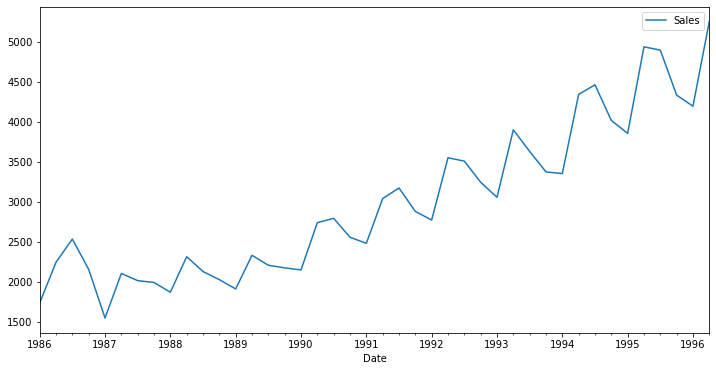

In [17]:
## interpolation was done for nan values which we get after doing upsampling by month
interpolated_month = upsampled_month.interpolate(method='linear')
print(interpolated_month.head(10))

interpolated_month.plot(figsize=(12,6))
plt.show()

In [18]:
interpolated_month.reset_index(inplace=True)
interpolated_month["month"] = interpolated_month.Date.dt.strftime("%b") # month extraction
df2 = interpolated_month
df2

,Date,Sales,month
0,1986-01-31,1734.827000,Jan
1,1986-02-28,1904.871666,Feb
2,1986-03-31,2074.916332,Mar
3,1986-04-30,2244.960999,Apr
4,1986-05-31,2341.242330,May
...,...,...,...
119,1995-12-31,4240.333333,Dec
120,1996-01-31,4194.000000,Jan
121,1996-02-29,4547.000000,Feb
122,1996-03-31,4900.000000,Mar


#### Adding t column

In [19]:
#adding t
df2['t'] = np.arange(1,len(df2)+1)


#### Converting months into dummies


In [20]:
months = pd.get_dummies(df2['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [21]:
months

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,0,1
120,1,0,0,0,0,0,0,0,0,0,0,0
121,0,1,0,0,0,0,0,0,0,0,0,0
122,0,0,1,0,0,0,0,0,0,0,0,0


In [22]:
# Joining months and original data
df3 = pd.concat([df2,months],axis=1)

In [23]:
df3 # Datem salesm month ,t and dmummies.

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,Dec,120,0,0,0,0,0,0,0,0,0,0,0,1
120,1996-01-31,4194.000000,Jan,121,1,0,0,0,0,0,0,0,0,0,0,0
121,1996-02-29,4547.000000,Feb,122,0,1,0,0,0,0,0,0,0,0,0,0
122,1996-03-31,4900.000000,Mar,123,0,0,1,0,0,0,0,0,0,0,0,0


In [24]:
df3

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,Dec,120,0,0,0,0,0,0,0,0,0,0,0,1
120,1996-01-31,4194.000000,Jan,121,1,0,0,0,0,0,0,0,0,0,0,0
121,1996-02-29,4547.000000,Feb,122,0,1,0,0,0,0,0,0,0,0,0,0
122,1996-03-31,4900.000000,Mar,123,0,0,1,0,0,0,0,0,0,0,0,0


#### Creating log and sqrt of sales

In [25]:
df3["Log_Sales"] = np.log(df3['Sales'])
df3["Sqrt_Sales"] = np.sqrt(df3['Sales'])

In [26]:
df3

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,Dec,120,0,0,0,0,0,0,0,0,0,0,0,1,8.352397,65.117842
120,1996-01-31,4194.000000,Jan,121,1,0,0,0,0,0,0,0,0,0,0,0,8.341410,64.761099
121,1996-02-29,4547.000000,Feb,122,0,1,0,0,0,0,0,0,0,0,0,0,8.422223,67.431447
122,1996-03-31,4900.000000,Mar,123,0,0,1,0,0,0,0,0,0,0,0,0,8.496990,70.000000


## Visualisations

<AxesSubplot:>

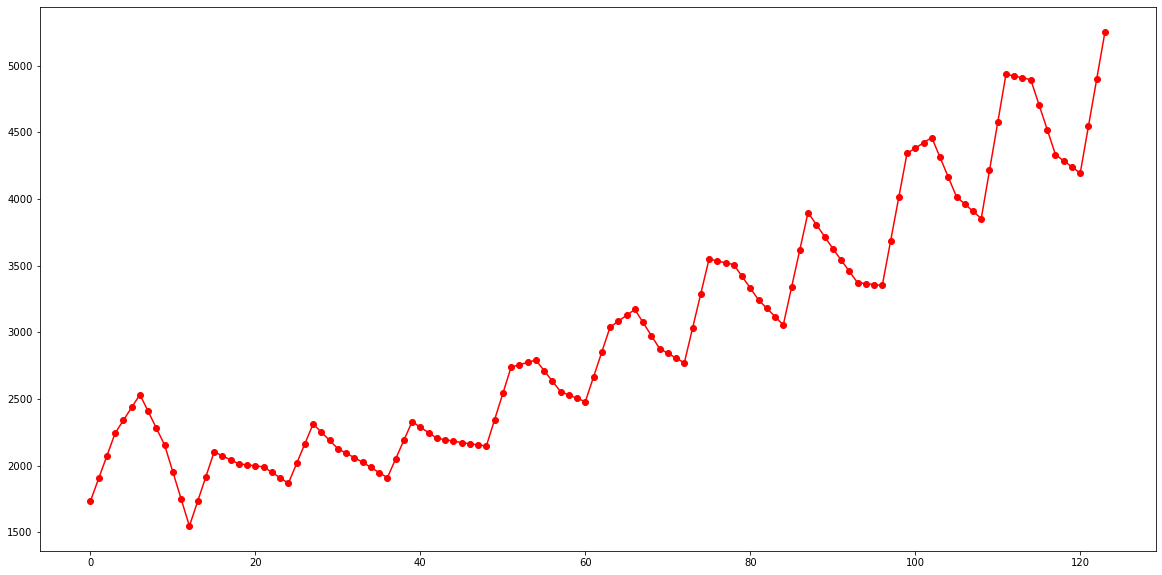

In [27]:
df3.Sales.plot(figsize=(20,10), color = 'red', marker= 'o')

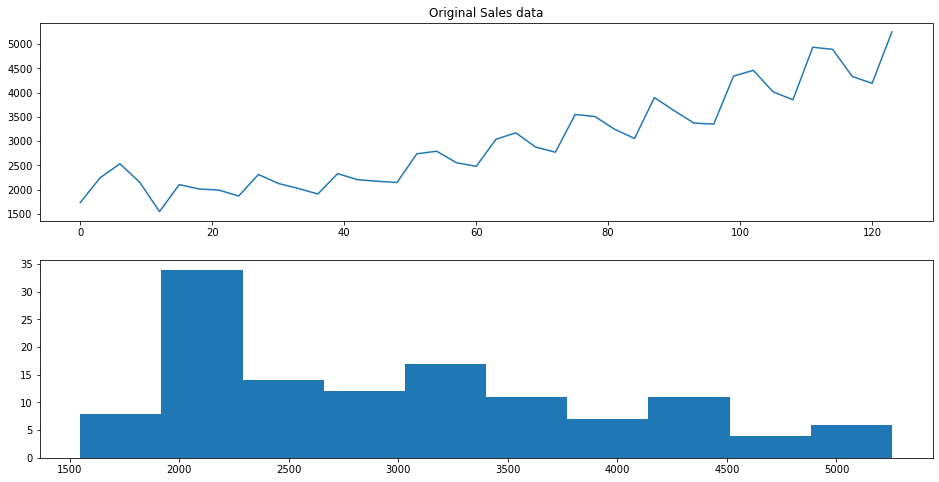

In [28]:
from matplotlib import pyplot
plt_1 = plt.figure(figsize=(16, 8))
# line plot
pyplot.subplot(211)
pyplot.plot(df3['Sales'])
plt.title('Original Sales data')
# histogram
pyplot.subplot(212)
pyplot.hist(df3['Sales'])
pyplot.show()

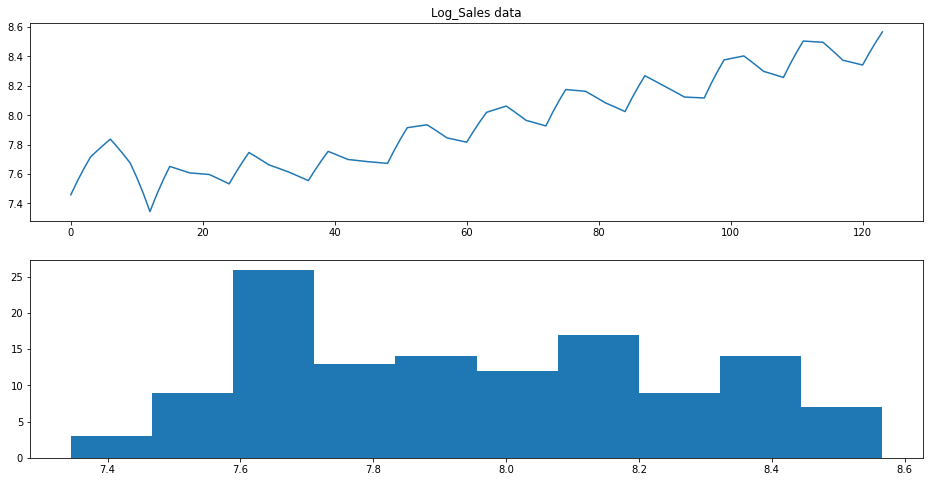

In [29]:
plt_1 = plt.figure(figsize=(16, 8))
# line plot
pyplot.subplot(211)
pyplot.plot(df3['Log_Sales'])
plt.title('Log_Sales data')
# histogram
pyplot.subplot(212)
pyplot.hist(df3['Log_Sales'])
pyplot.show()

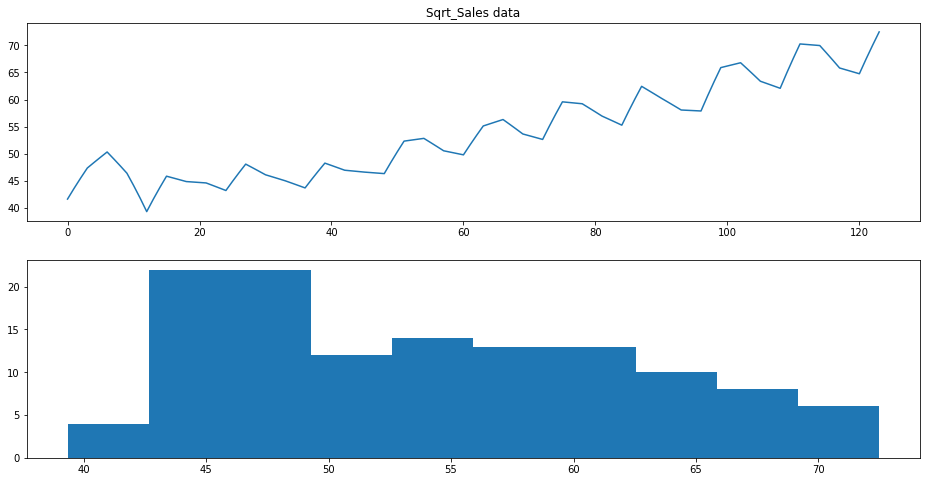

In [30]:
plt_1 = plt.figure(figsize=(16, 8))
# line plot
pyplot.subplot(211)
pyplot.plot(df3['Sqrt_Sales'])
plt.title('Sqrt_Sales data')
# histogram
pyplot.subplot(212)
pyplot.hist(df3['Sqrt_Sales'])
pyplot.show()

Text(0.5, 1.0, 'Heatmap')

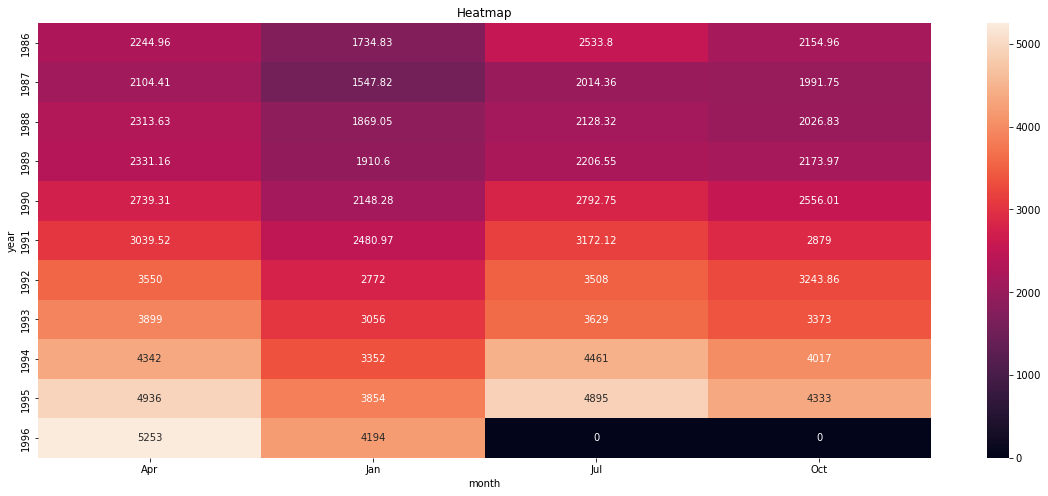

In [31]:
plt.figure(figsize=(20,8))
heatmap_y_month = pd.pivot_table(data=df,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values
plt.title('Heatmap')

Text(0.5, 1.0, 'Moving Average')

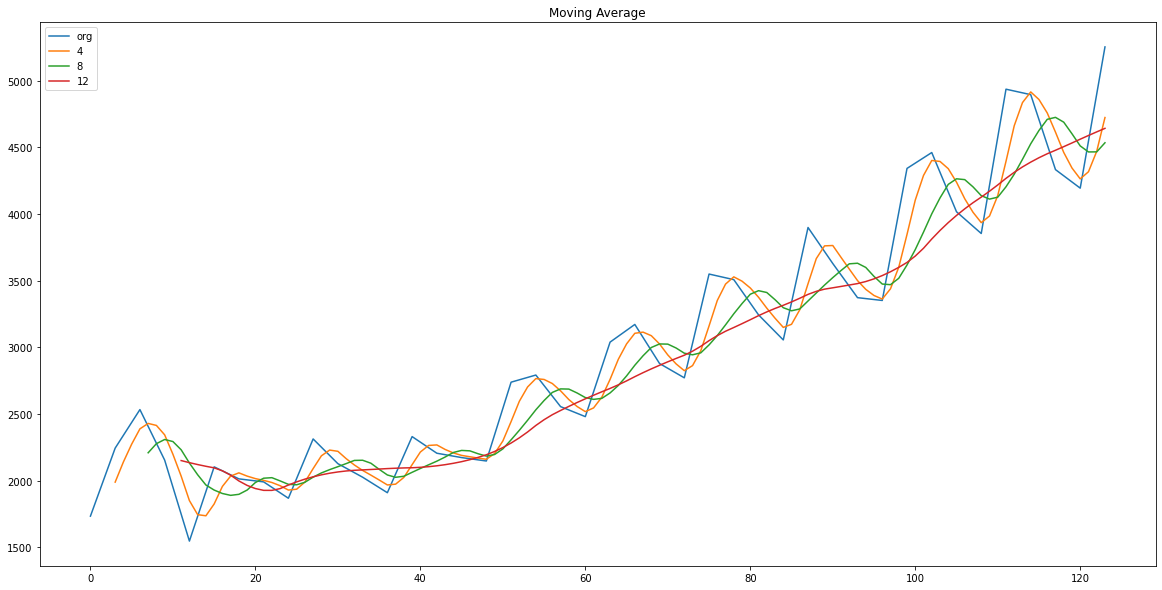

In [32]:
plt.figure(figsize=(20,10))
df3.Sales.plot(label="org")
for i in range(4,13,4):
    df3["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.title('Moving Average')

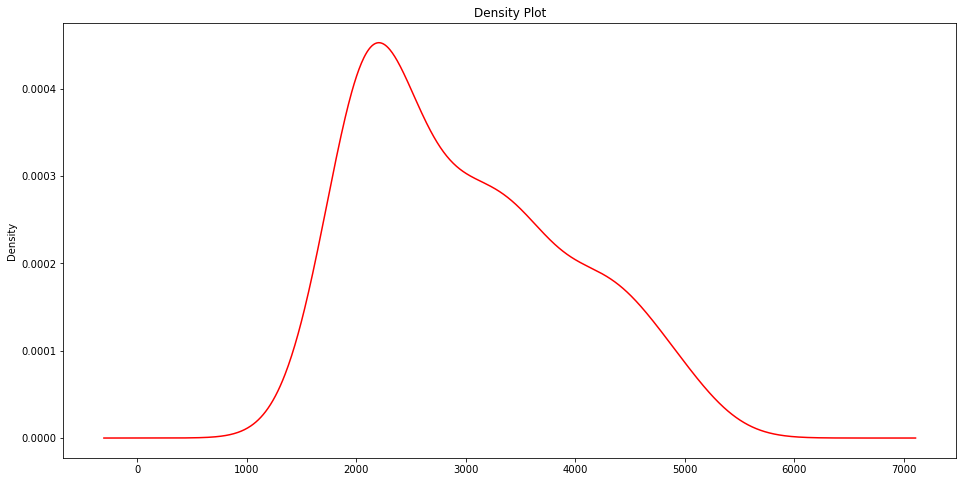

In [33]:
df3["Sales"].plot(figsize=(16,8), kind = "kde", color = "red")
plt.title("Density Plot")
plt.show()

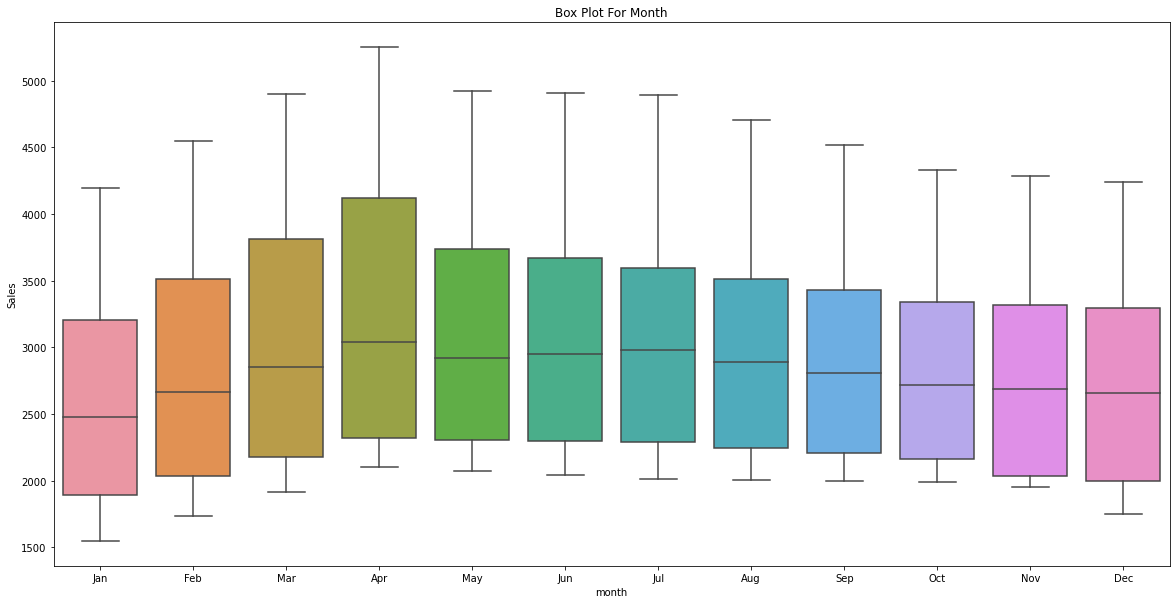

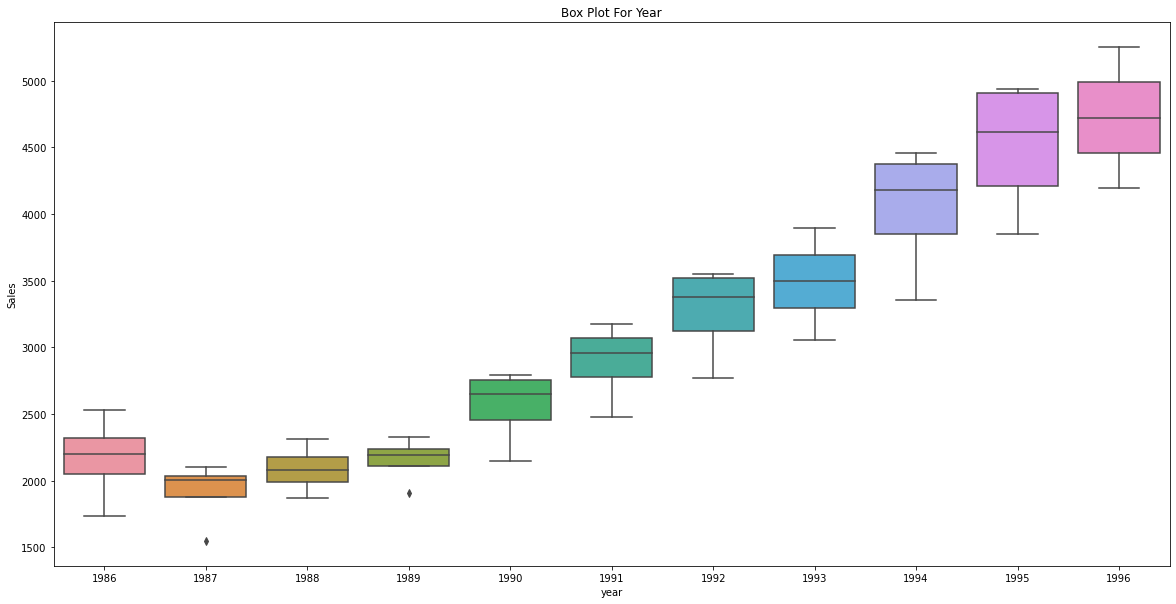

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "month",y = "Sales", data = df3)
plt.title("Box Plot For Month")
plt.show()
plt.figure(figsize=(20,10))
sns.boxplot(x = "year",y = "Sales", data = df)
plt.title("Box Plot For Year")
plt.show()

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

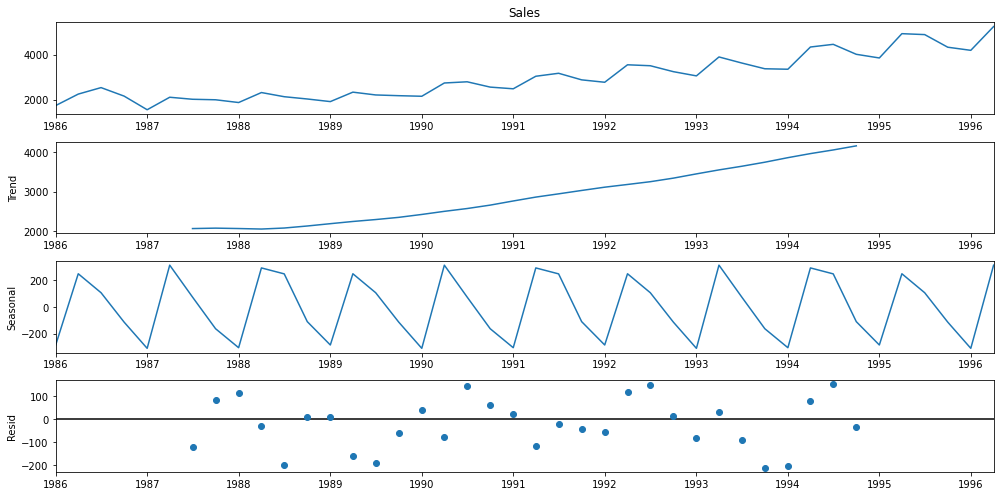

In [36]:
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(14,7))
    decompose_ts_add.plot()
    plt.show()

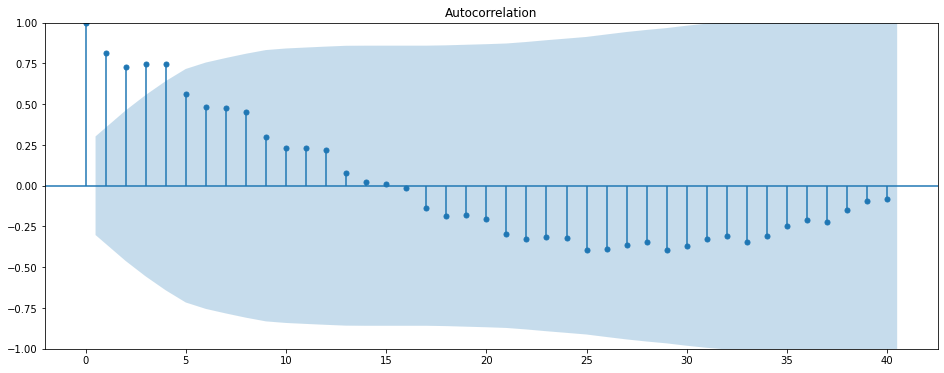

In [37]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(16,6))
    tsa_plots.plot_acf(df['Sales'],lags=40)
    plt.show()

E:\Python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


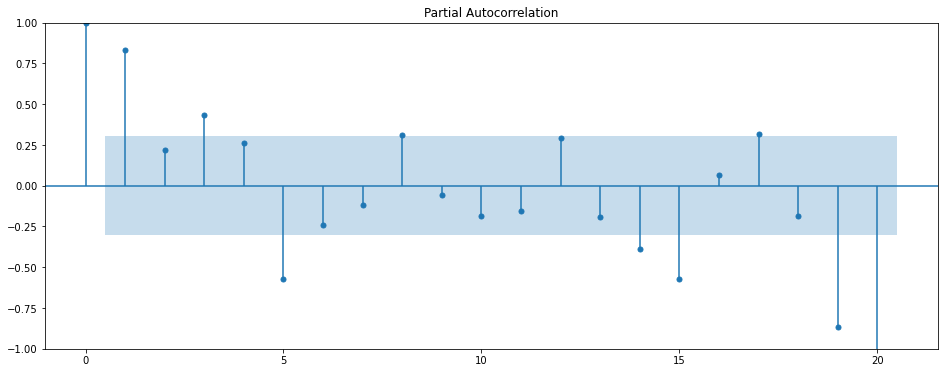

In [38]:
import statsmodels.graphics.tsaplots as tsa_plots
with plt.rc_context():
    plt.rc("figure", figsize=(16,6))
    tsa_plots.plot_pacf(df.Sales,lags=20)
    plt.show()

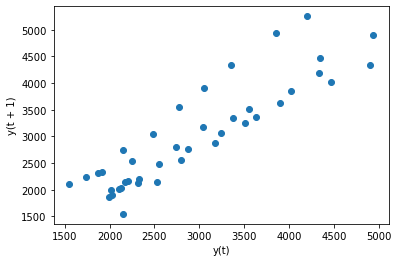

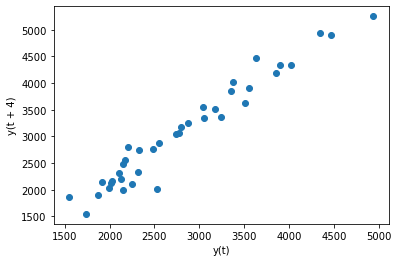

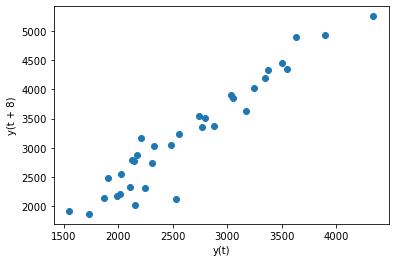

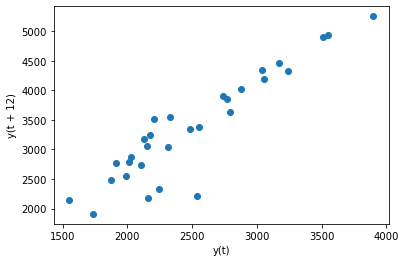

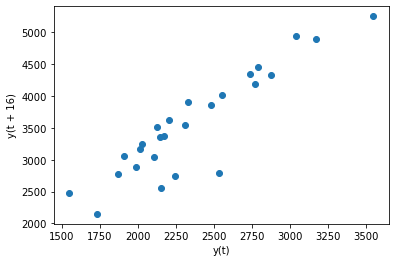

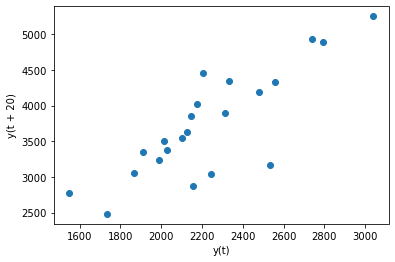

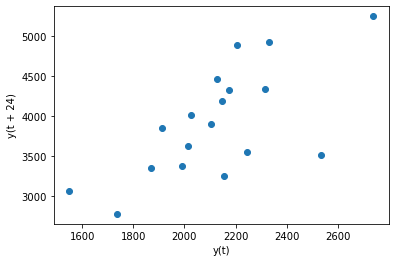

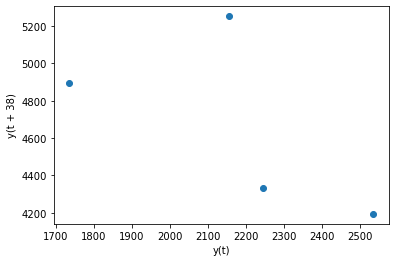

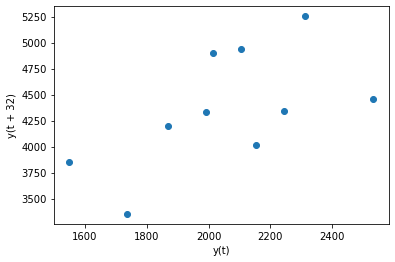

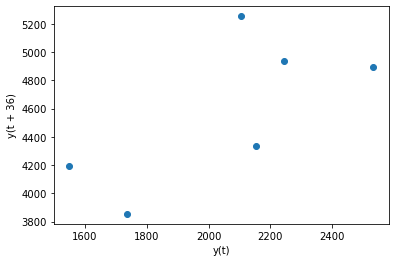

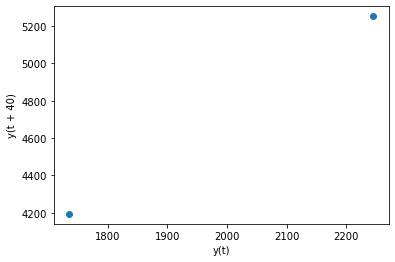

In [39]:
# create a scatter plot
from pandas.plotting import lag_plot
for i in [1, 4, 8, 12, 16, 20, 24, 38, 32, 36, 40]:
    #plt.figure(figsize=(16,8))
    lag_plot(df.Sales, lag=i)
    plt.show()


In [40]:
#Adding t_squared column
df3['t_squared'] = np.square(df3.t)
df3

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254,1
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836,4
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250,9
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019,16
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,Dec,120,0,0,0,0,0,0,0,0,0,0,0,1,8.352397,65.117842,14400
120,1996-01-31,4194.000000,Jan,121,1,0,0,0,0,0,0,0,0,0,0,0,8.341410,64.761099,14641
121,1996-02-29,4547.000000,Feb,122,0,1,0,0,0,0,0,0,0,0,0,0,8.422223,67.431447,14884
122,1996-03-31,4900.000000,Mar,123,0,0,1,0,0,0,0,0,0,0,0,0,8.496990,70.000000,15129


In [41]:
#70% of data into Train data and rest for Test Data.

size = 100

Train = df3.iloc[:size]
Test = df3.iloc[size:]
Train.shape , Test.shape

((100, 19), (24, 19))

In [42]:
Train

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254,1
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836,4
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250,9
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019,16
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1993-12-31,3359.000000,Dec,96,0,0,0,0,0,0,0,0,0,0,0,1,8.119399,57.956881,9216
96,1994-01-31,3352.000000,Jan,97,1,0,0,0,0,0,0,0,0,0,0,0,8.117312,57.896459,9409
97,1994-02-28,3682.000000,Feb,98,0,1,0,0,0,0,0,0,0,0,0,0,8.211211,60.679486,9604
98,1994-03-31,4012.000000,Mar,99,0,0,1,0,0,0,0,0,0,0,0,0,8.297045,63.340350,9801


In [43]:
Test

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
100,1994-05-31,4381.666667,May,101,0,0,0,0,1,0,0,0,0,0,0,0,8.385184,66.194159,10201
101,1994-06-30,4421.333333,Jun,102,0,0,0,0,0,1,0,0,0,0,0,0,8.394197,66.493107,10404
102,1994-07-31,4461.000000,Jul,103,0,0,0,0,0,0,1,0,0,0,0,0,8.403128,66.790718,10609
103,1994-08-31,4313.000000,Aug,104,0,0,0,0,0,0,0,1,0,0,0,0,8.369389,65.673435,10816
104,1994-09-30,4165.000000,Sep,105,0,0,0,0,0,0,0,0,1,0,0,0,8.334472,64.536811,11025
105,1994-10-31,4017.000000,Oct,106,0,0,0,0,0,0,0,0,0,1,0,0,8.298291,63.379808,11236
106,1994-11-30,3962.666667,Nov,107,0,0,0,0,0,0,0,0,0,0,1,0,8.284672,62.949715,11449
107,1994-12-31,3908.333333,Dec,108,0,0,0,0,0,0,0,0,0,0,0,1,8.270866,62.516664,11664
108,1995-01-31,3854.000000,Jan,109,1,0,0,0,0,0,0,0,0,0,0,0,8.256867,62.080593,11881
109,1995-02-28,4214.666667,Feb,110,0,1,0,0,0,0,0,0,0,0,0,0,8.346326,64.920464,12100


#### 1) Linear Model

In [44]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=df3).fit()
pred_linear =  linear_model.predict(pd.DataFrame(Test['t']))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

415.6440965953751

In [45]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     800.4
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.98e-55
Time:                        12:25:45   Log-Likelihood:                -898.20
No. Observations:                 124   AIC:                             1800.
Df Residuals:                     122   BIC:                             1806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1472.3675     61.668     23.876      0.000    1350.289    1594.446
t             24.2229      0.856     28.291      0.000      22.528      25.918
==============================================================================
Omnibus:                       10.071   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.994
Skew:                           0.725   Prob(JB):                      0.00410
Kurtosis:                       2.848   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 2) Quadratic Model

In [46]:
Quad = smf.ols('Sales~t+t_squared',data=df3).fit()
pred_Quad = Quad.predict(Test[["t","t_squared"]])
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

353.34637439220444

In [47]:
Quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     727.6
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           3.56e-68
Time:                        12:25:45   Log-Likelihood:                -864.46
No. Observations:                 124   AIC:                             1735.
Df Residuals:                     121   BIC:                             1743.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1974.7232     71.482     27.625      0.000    1833.205    2116.241
t              0.3012      2.640      0.114      0.909      -4.925       5.528
t_squared      0.1914      0.020      9.354      0.000       0.151       0.232
==============================================================================
Omnibus:                        5.640   Durbin-Watson:                   0.304
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.051
Skew:                           0.140   Prob(JB):                        0.218
Kurtosis:                       2.284   Cond. No.                     2.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 3) Exponential Model

In [48]:
Exp = smf.ols('Log_Sales~t',data=Train).fit()
pred_Exp = Exp.predict(pd.DataFrame(Test['t']))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

530.3268025099092

In [49]:
Exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     406.5
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.20e-36
Time:                        12:25:45   Log-Likelihood:                 84.607
No. Observations:                 100   AIC:                            -165.2
Df Residuals:                      98   BIC:                            -160.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4782      0.021    353.829      0.000       7.436       7.520
t              0.0073      0.000     20.162      0.000       0.007       0.008
==============================================================================
Omnibus:                        6.147   Durbin-Watson:                   0.225
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.627
Skew:                           0.561   Prob(JB):                       0.0600
Kurtosis:                       3.301   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 4) Additive Seasonality Model

In [50]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=df3).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1487.0253323250397

In [51]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.050
Method:                 Least Squares   F-statistic:                    0.4662
Date:                Thu, 29 Sep 2022   Prob (F-statistic):              0.920
Time:                        12:25:45   Log-Likelihood:                -1020.8
No. Observations:                 124   AIC:                             2066.
Df Residuals:                     112   BIC:                             2100.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2756.6171     79.469     34.688      0.000    2599.160    2914.074
Jan         -127.5669    277.252     -0.460      0.646    -676.906     421.772
Feb          109.8103    277.252      0.396      0.693    -439.528     659.149
Mar          347.1875    277.252      1.252      0.213    -202.151     896.526
Apr          584.5648    277.252      2.108      0.037      35.226    1133.903
May          388.0799    289.696      1.340      0.183    -185.916     962.076
Jun          382.7768    289.696      1.321      0.189    -191.219     956.772
Jul          377.4737    289.696      1.303      0.195    -196.522     951.469
Aug          291.0893    289.696      1.005      0.317    -282.906     865.085
Sep          204.7050    289.696      0.707      0.481    -369.291     778.701
Oct          118.3207    289.696      0.408      0.684    -455.675     692.316
Nov           66.1656    289.696      0.228      0.820    -507.830     640.161
Dec           14.0105    289.696      0.048      0.962    -559.985     588.006
==============================================================================
Omnibus:                       24.637   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.716
Skew:                           0.515   Prob(JB):                      0.00471
Kurtosis:                       1.993   Cond. No.                     1.17e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 5) Multiplicative Seasonality Model

In [52]:
Mul_sea = smf.ols('Log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = df3).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

180.68234635382387

In [53]:
Mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     148.5
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           1.83e-62
Time:                        12:25:46   Log-Likelihood:                 146.96
No. Observations:                 124   AIC:                            -267.9
Df Residuals:                     111   BIC:                            -231.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8765      0.013    526.593      0.000       6.851       6.902
t              0.0081      0.000     41.161      0.000       0.008       0.008
Jan            0.4528      0.023     19.998      0.000       0.408       0.498
Feb            0.5316      0.023     23.470      0.000       0.487       0.576
Mar            0.6033      0.023     26.627      0.000       0.558       0.648
Apr            0.6691      0.023     29.517      0.000       0.624       0.714
May            0.6574      0.024     27.796      0.000       0.611       0.704
Jun            0.6472      0.024     27.361      0.000       0.600       0.694
Jul            0.6366      0.024     26.907      0.000       0.590       0.683
Aug            0.6027      0.024     25.469      0.000       0.556       0.650
Sep            0.5680      0.024     23.992      0.000       0.521       0.615
Oct            0.5322      0.024     22.475      0.000       0.485       0.579
Nov            0.5031      0.024     21.233      0.000       0.456       0.550
Dec            0.4726      0.024     19.938      0.000       0.426       0.520
==============================================================================
Omnibus:                       30.099   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.074
Skew:                           1.074   Prob(JB):                     1.81e-12
Kurtosis:                       5.419   Cond. No.                     1.03e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.09e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 6) Multiplicative Additive Seasonality Model.

In [54]:
Mul_Add_sea = smf.ols('Log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

396.41978173824583

In [55]:
Mul_Add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     61.10
Date:                Thu, 29 Sep 2022   Prob (F-statistic):           4.29e-37
Time:                        12:25:46   Log-Likelihood:                 114.86
No. Observations:                 100   AIC:                            -203.7
Df Residuals:                      87   BIC:                            -169.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9000      0.015    450.015      0.000       6.870       6.931
t              0.0074      0.000     25.888      0.000       0.007       0.008
Jan            0.4543      0.026     17.240      0.000       0.402       0.507
Feb            0.5342      0.026     20.263      0.000       0.482       0.587
Mar            0.6069      0.026     23.011      0.000       0.554       0.659
Apr            0.6736      0.026     25.526      0.000       0.621       0.726
May            0.6553      0.028     23.563      0.000       0.600       0.711
Jun            0.6445      0.028     23.171      0.000       0.589       0.700
Jul            0.6332      0.028     22.759      0.000       0.578       0.688
Aug            0.6027      0.028     21.656      0.000       0.547       0.658
Sep            0.5714      0.028     20.523      0.000       0.516       0.627
Oct            0.5392      0.028     19.360      0.000       0.484       0.595
Nov            0.5085      0.028     18.246      0.000       0.453       0.564
Dec            0.4763      0.028     17.077      0.000       0.421       0.532
==============================================================================
Omnibus:                       14.672   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.352
Skew:                           0.801   Prob(JB):                     0.000171
Kurtosis:                       4.264   Cond. No.                     7.61e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.84e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### 7) ARIMA Model

In [56]:
cocacola = df3.copy()

In [57]:
cocacola.head()

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254,1
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836,4
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250,9
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019,16
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386,25


In [58]:
cocacola.set_index('Date',inplace=True)
cocacola.index.year

Int64Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
            ...
            1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996],
           dtype='int64', name='Date', length=124)

In [59]:
cocacola.head()

,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
Date,,,,,,,,,,,,,,,,,,
1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254,1
1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836,4
1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250,9
1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019,16
1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386,25


#### Implementing ADF(Augmented Dickey fuller) test to perform Stationnarity check


In [60]:
from statsmodels.tsa.stattools import adfuller
print('Results od ADF Test: ')
print('NUll hypothesis(H0): Data is not Stationary')
print('Alternate hypothesis(H0): Data is Stationary')
dftest = adfuller(cocacola.Sales,autolag='AIC')
dfoutput= pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags used','no of observations used'])
for key,value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value
print(dfoutput)

Results od ADF Test: 
NUll hypothesis(H0): Data is not Stationary
Alternate hypothesis(H0): Data is Stationary
Test Statistic               0.572599
p-value                      0.986920
lags used                   10.000000
no of observations used    113.000000
Critical value (1%)         -3.489590
Critical value (5%)         -2.887477
Critical value (10%)        -2.580604
dtype: float64


#### Observations 1.Dataset is not stationary as the observed p-value is much higher than our significant level of 0.05 or 5%(0.986>0.05)

Therefore: Mean is not constant and variance is not constant

Ways to Transform Non stationary data to stationary data

1.Log transformation <br>
2.Subtracting simple moving average<br>
3.Subtracting Exponential moving avg<br>
4.Subtracting from previous value(shift)<br>
5.Seasonal Decomposition<br>

#### Converting non-stationary data into stationary data using log transforation

In [61]:
df3

,Date,Sales,month,t,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Log_Sales,Sqrt_Sales,t_squared
0,1986-01-31,1734.827000,Jan,1,1,0,0,0,0,0,0,0,0,0,0,0,7.458663,41.651254,1
1,1986-02-28,1904.871666,Feb,2,0,1,0,0,0,0,0,0,0,0,0,0,7.552170,43.644836,4
2,1986-03-31,2074.916332,Mar,3,0,0,1,0,0,0,0,0,0,0,0,0,7.637676,45.551250,9
3,1986-04-30,2244.960999,Apr,4,0,0,0,1,0,0,0,0,0,0,0,0,7.716443,47.381019,16
4,1986-05-31,2341.242330,May,5,0,0,0,0,1,0,0,0,0,0,0,0,7.758437,48.386386,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,Dec,120,0,0,0,0,0,0,0,0,0,0,0,1,8.352397,65.117842,14400
120,1996-01-31,4194.000000,Jan,121,1,0,0,0,0,0,0,0,0,0,0,0,8.341410,64.761099,14641
121,1996-02-29,4547.000000,Feb,122,0,1,0,0,0,0,0,0,0,0,0,0,8.422223,67.431447,14884
122,1996-03-31,4900.000000,Mar,123,0,0,1,0,0,0,0,0,0,0,0,0,8.496990,70.000000,15129


In [62]:
cocacola = df3.iloc[:,:2]

In [63]:
cocacola

,Date,Sales
0,1986-01-31,1734.827000
1,1986-02-28,1904.871666
2,1986-03-31,2074.916332
3,1986-04-30,2244.960999
4,1986-05-31,2341.242330
...,...,...
119,1995-12-31,4240.333333
120,1996-01-31,4194.000000
121,1996-02-29,4547.000000
122,1996-03-31,4900.000000


In [64]:
cocacola.set_index('Date',inplace=True)
cocacola.index.year

Int64Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
            ...
            1995, 1995, 1995, 1995, 1995, 1995, 1996, 1996, 1996, 1996],
           dtype='int64', name='Date', length=124)

In [65]:
cocacola

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


#### Removing Trend By Log Transformation.

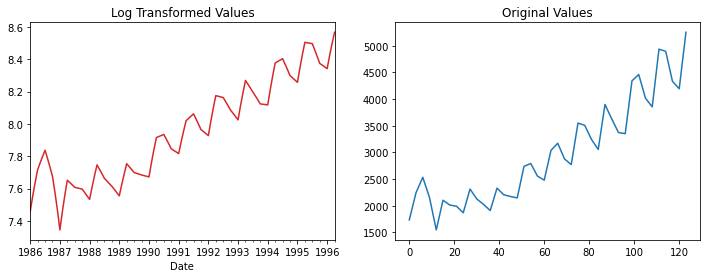

In [66]:
log_Cocacola = cocacola["Sales"].apply(lambda x : np.log(x))

ax1 = plt.subplot(121)
log_Cocacola.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
ax2 = plt.subplot(122)
df3.Sales.plot(color="tab:blue", title="Original Values", ax=ax2);

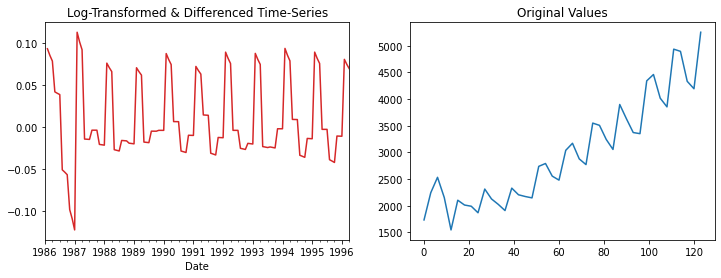

In [67]:
log_Cocacola_diff = log_Cocacola - log_Cocacola.shift()

ax1 = plt.subplot(121)
log_Cocacola_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
ax2 = plt.subplot(122)
df3.Sales.plot(figsize=(12,4), color="tab:blue", title="Original Values", ax=ax2);

In [68]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(log_Cocacola_diff.dropna().values, autolag = 'AIC')

print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -3.030060213253419
2. P-Value :  0.03218092739693495
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 110
5. Critical Values :
	 1% :  -3.4912451337340342
	 5% :  -2.8881954545454547
	 10% :  -2.5809876033057852


Observations: As the p value obtained is lesser than the threshold value 0.05, we accept alternate hypothesis, it says data is stationary

#### Splitting data

In [69]:
Cocacola =  log_Cocacola_diff

In [70]:
Cocacola

Date
1986-01-31         NaN
1986-02-28    0.093507
1986-03-31    0.085506
1986-04-30    0.078767
1986-05-31    0.041994
                ...   
1995-12-31   -0.010868
1996-01-31   -0.010987
1996-02-29    0.080813
1996-03-31    0.074768
1996-04-30    0.069564
Name: Sales, Length: 124, dtype: float64

In [71]:
# separate out a validation dataset

train_data = cocacola[:100]
test_data = cocacola[100:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))
train_data.to_csv('Cocacola_train.csv', header=False)
test_data.to_csv('Cocacola_validation.csv', header=False)

Dataset 100, Validation 24


In [72]:
train_data.head()

,Sales
Date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330


In [73]:
test_data.head()

,Sales
Date,
1994-05-31,4381.666667
1994-06-30,4421.333333
1994-07-31,4461.000000
1994-08-31,4313.000000
1994-09-30,4165.000000


In [74]:
# Splitting Interpolated original data
size = int(np.round(len(df3)*0.70,))

cocacola_train = df3.Sales[:size]
cocacola_validation = df3.Sales[size:]
print('Dataset %d, Validation %d' % (len(cocacola_train), len(cocacola_validation)))
cocacola_train.to_csv('cocacola_train.csv', header=False)
cocacola_validation.to_csv('cocacola_validation.csv', header=False)

Dataset 87, Validation 37


####  ARIMA Hyperparameter Tuning.

In [75]:
# grid search ARIMA parameters for a time series

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt
from sklearn.metrics import mean_squared_error

def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [76]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [77]:
# load dataset
train = pd.read_csv('cocacola_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train = train.astype('int64')
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(train.values, p_values, d_values, q_values)

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_10588\44864995.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('cocacola_train.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
E:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\Python\lib\site-packag

LU decomposition error.


E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.

Best ARIMA(3, 1, 4) RMSE=71.474


E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Final Model

In [83]:
# separate out a validation dataset
size = int(np.round(len(cocacola_train)*0.70,))

train_data = cocacola_train[:size]
test_data = cocacola_train[size:]
print('Dataset %d, Validation %d' % (len(train_data), len(test_data)))

Dataset 61, Validation 26


In [84]:
model = ARIMA(cocacola_train,order=(3, 1, 4))
results = model.fit()
results.summary()

E:\Python\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   87
Model:                 ARIMA(3, 1, 4)   Log Likelihood                -485.695
Date:                Thu, 29 Sep 2022   AIC                            987.390
Time:                        12:39:03   BIC                           1007.025
Sample:                             0   HQIC                           995.292
                                 - 87                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4133      0.330      4.287      0.000       0.767       2.060
ar.L2         -0.5527      0.524     -1.055      0.291      -1.579       0.474
ar.L3         -0.2518      0.304     -0.828      0.408      -0.848       0.345
ma.L1         -0.5459      8.877     -0.061      0.951     -17.945      16.853
ma.L2          0.2935      2.590      0.113      0.910      -4.782       5.369
ma.L3         -0.5501     18.260     -0.030      0.976     -36.339      35.239
ma.L4          0.9952     17.083      0.058      0.954     -32.487      34.477
sigma2      4094.8642   6.98e+04      0.059      0.953   -1.33e+05    1.41e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                35.01
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             0.80
Prob(H) (two-sided):                  0.69   Kurtosis:                         5.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
# Obtain predicted values
start=len(train_data)
end=len(cocacola_train)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions = predictions.rename('ARIMA(3, 1, 4) Predictions')

In [86]:
from statsmodels.tools.eval_measures import rmse

rmse_arima = rmse(test_data, predictions)
rmse_arima.round(2)

77.39

In [87]:
#Compare the results 

data = {"MODEL":pd.Series(["Linear Model","Quadratic Model","Exponential Model","Additive Seasonality Model","Multiplicative Seasonality Model",
                           "Multiplicative Additive Seasonality Model","ARIMA_Model"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_Exp,rmse_add_sea,rmse_Mult_sea,rmse_Mult_add_sea,rmse_arima.round(2)])} 
table_rmse = pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,ARIMA_Model,77.390000
4,Multiplicative Seasonality Model,180.682346
1,Quadratic Model,353.346374
5,Multiplicative Additive Seasonality Model,396.419782
0,Linear Model,415.644097
2,Exponential Model,530.326803
3,Additive Seasonality Model,1487.025332
